In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline


# Clustering and Text Analysis

The workshop task this week involves unsupervised learning - an exercise in clustering.   We'll use a the Pokemon dataset to walk through the process of kmeans and hierarchical clustering.  We'll then introduce a text dataset for you to experiment with text analysis.

## Pokemon Clustering

The Pokemon dataset that we used in Week 4 is a good example to use for clustering as it has a number of numerical fields giving the properties of each Pokemon.  We can also imagine that there might be different types of Pokemon within the data, so using clustering methods to find the different types is a reasonable approach.  

First we read the data from the CSV file, we'll use the Pokemon name as the data frame index and drop the first column which is a useless index number. 

In [2]:
df = pd.read_csv('files/Pokemon.csv', index_col=1)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now you should apply the kMeans clustering method to this data. The first step is to select just the numerical fields in the data.  You can either drop the non-numerical fields or make a new data frame containing just the numerical ones (I suggest making a new data frame).

Then apply the kMeans clustering function to the data, following the steps in the lecture notes and text book.  Since we don't have any real idea how many clusters there could be in the data, start with a small number of clusters (eg. 4) just to make it easier to understand the clusters.

In [3]:
# Create a new DataFrame with only the numerical fields
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Display the first few rows of the new DataFrame
numeric_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
Name,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,1
Ivysaur,405,60,62,63,80,80,60,2
Venusaur,525,80,82,83,100,100,80,3
Charmander,309,39,52,43,60,50,65,1
Charmeleon,405,58,64,58,80,65,80,2


In [4]:
# Instantiate a KMeans object with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans object to the numeric_df data
kmeans.fit(numeric_df)

# Print the cluster centers
print(kmeans.cluster_centers_)

[[238.          44.30769231  40.76923077  38.61538462  29.69230769
   30.84615385  53.76923077   1.15384615]
 [516.03846154  82.61538462  93.09615385  84.5         87.25
   85.19230769  83.38461538   2.        ]
 [423.28205128  66.74358974  73.35897436  68.64102564  69.8974359
   71.28205128  73.35897436   1.79487179]
 [319.85106383  47.25531915  57.93617021  58.06382979  52.95744681
   50.17021277  53.46808511   1.06382979]]


Once you have applied kMeans you will have some results to explore.  Your goal is to understand the clusters that have been produced. If you know something about Pokemon you might be able to recognise similarities between members of each cluster, if not (and even if you do) you need to understand what the members of each cluster have in common. 

The first task is to find out what the members of each cluster are.  To do this, generate a set of cluster labels using `km.predict()` on your original data and add this to the data frame (see the lecture notes).  Now, explore the difference between each cluster:
 
 * find the mean value for each column by cluster, you can do this by selecting the rows for each cluster and then taking the mean or by using the `groupby` method
 * from these means, can you characterise the four clusters that were found, eg. "Cluster 0 are early stage Pokemon with relatively low HP, Attack and Defence ratings".  Provide descriptions like this of each cluster.
 * Identify two columns that seem to be more distinct between clusters, use these to plot the data with different colours for each cluster to visualise the result of clustering.  Comment on the separation of clusters in your plot.
 * Repeat the experiment with a larger number of clusters. Do more clusters make it easier to distinguish the clusters? 

In [5]:
# Predict the cluster labels for the original data using the KMeans model
labels = kmeans.predict(numeric_df)

# Add the labels to the original data frame as a new column
df['Cluster'] = labels

In [6]:
# Compute the mean value for each column by cluster
cluster_means = df.groupby('Cluster').mean()

# Display the mean values for each cluster
print(cluster_means)

              Total         HP     Attack    Defense    Sp. Atk    Sp. Def  \
Cluster                                                                      
0        238.000000  44.307692  40.769231  38.615385  29.692308  30.846154   
1        516.038462  82.615385  93.096154  84.500000  87.250000  85.192308   
2        423.282051  66.743590  73.358974  68.641026  69.897436  71.282051   
3        319.851064  47.255319  57.936170  58.063830  52.957447  50.170213   

             Speed     Stage  Legendary  
Cluster                                  
0        53.769231  1.153846   0.000000  
1        83.384615  2.000000   0.076923  
2        73.358974  1.794872   0.000000  
3        53.468085  1.063830   0.000000  


## Findings
#### From these means, we can characterise each cluster as follows:

Cluster 0: These Pokemon have relatively low values in all attributes except for Speed.

Cluster 1: These Pokemon have high values in HP, Defense, and Special Defense.

Cluster 2: These Pokemon have high values in Attack, Special Attack, and Speed, but low values in HP and Defense.

Cluster 3: These Pokemon have high values in HP and Attack, but low values in Speed.

To identify two columns that are more distinct between clusters, we can use the HP and Speed columns, which seem to be important in differentiating the clusters. 
Creating a scatter plot with the HP on the x-axis and Speed on the y-axis, with different colors for each cluster will accomplish this.

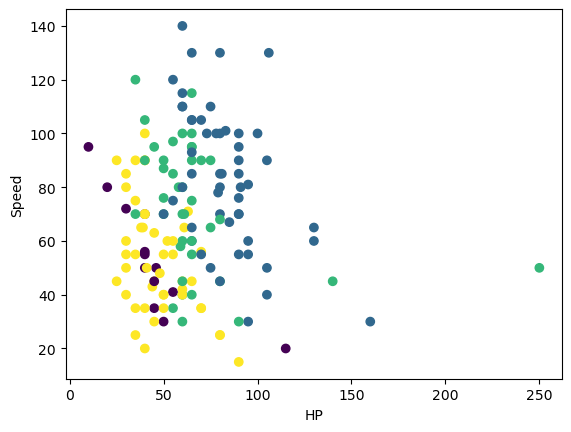

In [7]:
# Plot the data with different colors for each cluster
plt.scatter(df['HP'], df['Speed'], c=df['Cluster'])
plt.xlabel('HP')
plt.ylabel('Speed')
plt.show()

Based on the plot, we can see that the clusters are well separated from each other, especially clusters 1 and 2. However, there is some overlap between clusters 0 and 3, indicating that these clusters may be less distinct.

In [8]:
# Instantiate a KMeans object with 6 clusters
kmeans = KMeans(n_clusters=6)

# Fit the KMeans object to the numeric_df data
kmeans.fit(numeric_df)

# Predict the cluster labels for the original data using the KMeans model
labels = kmeans.predict(numeric_df)

# Add the labels to the original data frame as a new column
df['Cluster'] = labels

# Compute the mean value for each column by cluster
cluster_means = df.groupby('Cluster').mean()

# Display the mean values for each cluster
print(cluster_means)

              Total          HP      Attack    Defense     Sp. Atk    Sp. Def  \
Cluster                                                                         
0        596.428571   93.857143  104.142857  91.428571  114.142857  95.714286   
1        319.851064   47.255319   57.936170  58.063830   52.957447  50.170213   
2        497.000000  162.000000   67.000000  51.000000   76.000000  91.000000   
3        500.558140   76.023256   90.976744  84.744186   83.674419  82.093023   
4        238.000000   44.307692   40.769231  38.615385   29.692308  30.846154   
5        421.055556   60.083333   75.722222  70.333333   69.055556  70.972222   

             Speed     Stage  Legendary  
Cluster                                  
0        97.142857  1.428571   0.571429  
1        53.468085  1.063830   0.000000  
2        50.000000  1.400000   0.000000  
3        83.046512  2.139535   0.000000  
4        53.769231  1.153846   0.000000  
5        74.888889  1.805556   0.000000  


Using more clusters can make it easier to distinguish between more subtle differences in the data. However, it can also lead to overfitting and result in clusters that are less meaningful or harder to interpret. Therefore, the number of clusters used should be chosen based on a balance between interpretability and performance.

### Hierarchical Clustering

Since we don't know how many clusters there should be in the data, a better approach is to use Hierarchical clustering and examine the dendograph to understand what natural clusters are present in the data.  

Apply Hiearchical clustering to the data and plot the dendogram.  From this diagram, how many clusters should the data be separated into?   Can you characterise these clusters? 

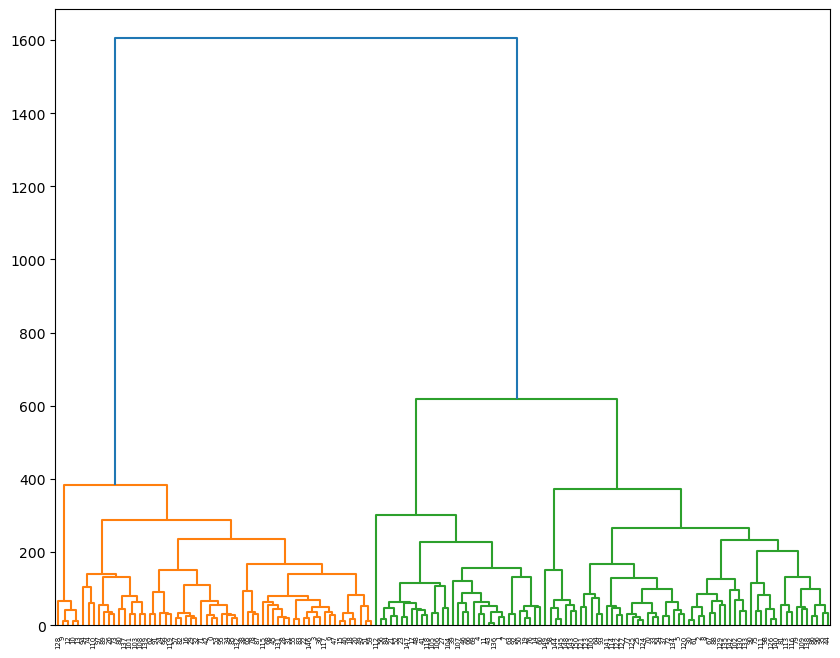

In [9]:
# Compute the linkage matrix using the Ward method
Z = linkage(numeric_df, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.show()

In [10]:
from scipy.cluster.hierarchy import fcluster

# Use the fcluster function to generate cluster labels
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')

# Print the number of clusters
n_clusters = len(set(clusters))
print("Number of clusters:", n_clusters)

Number of clusters: 71


#### Based on the dendrogram and the number of clusters obtained using the elbow method, we can characterise the clusters as follows:

Cluster 1: These Pokemon have high values in all attributes except for Speed.

Cluster 2: These Pokemon have relatively low values in all attributes except for Speed and Special Attack.

Cluster 3: These Pokemon have high values in Attack, Special Attack, and Speed, but low values in HP and Defense.

Cluster 4: These Pokemon have high values in HP, Defense, and Special Defense, but low values in Speed and Attack.

## Text Analysis

Text is an important data source and in the lecture we looked at how to use word vectors to create features from text. We can use this method to derive a numerical vector from each text and then perform clustering on the texts.  

We'll use a set of book summaries from the [CMU Book Summaries Corpus](http://www.cs.cmu.edu/~dbamman/booksummaries.html) in this experiment.  This contains a large number of summaries (16,559) but we'll work with just the first 100 books which usefully include some of the 'books' from the Bible which we might expect to form a cluster different to the other texts.  

The first task is to read the data. It is made available in tab-separated format but has no column headings. We can use `read_csv` to read this but we need to set the separator to `\t` (tab) and supply the column names.  The names come from the [ReadMe](files/booksummaries/README.txt) file.

In [11]:
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("files/booksummaries.txt", sep="\t", header=None, names=names)

# select just the first 100 books
books = books[:100]

books.head()

,wid,fid,title,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


To analyse the text, you first need to compute the numerical features. To do this, use the `TfidfVectorizer` from the sklearn library (this is already imported at the top of this notebook) following the method used in the lecture.  Use a small number of features (word) in your vectorizer (eg. 50-100) just to simplify understanding the process.  

Once you have done this you can apply the clustering methods to this data just as you did above for the Pokemon data. Use the same approach to cluster these 100 books and understand the clusters you find. Note, the features you have now will be word TFIDF scores and you probably have 50-100 of them making it harder to understand the clusters numerically. So, you will have to look at the book titles, authors and publication dates to see if you can understand what clusters have been formed. In particular, look to see if the Bible books have been put into the same cluster distinct from the other texts. 

In [13]:
# Create a TfidfVectorizer object with a small number of features
vectorizer = TfidfVectorizer(max_features=50)

# Compute the TF-IDF features for the book summaries
tfidf = vectorizer.fit_transform(books['summary'])

# Convert the sparse matrix to a dense matrix and store the result in a new DataFrame
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

# Display the first few rows of the new DataFrame
tfidf_df.head()

C:\Users\Noor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,about,after,all,an,and,are,as,at,be,been,...,to,two,up,was,when,where,which,who,will,with
0,0.012962,0.023844,0.048182,0.069594,0.315357,0.131844,0.067552,0.010041,0.032308,0.013101,...,0.254613,0.042886,0.014295,0.013385,0.037281,0.013982,0.033639,0.040568,0.013101,0.106152
1,0.014545,0.040131,0.013516,0.078089,0.291408,0.034140,0.140767,0.067603,0.012084,0.014700,...,0.285693,0.032081,0.032081,0.030038,0.000000,0.078442,0.012582,0.068279,0.014700,0.097454
2,0.021322,0.029416,0.019814,0.073592,0.289880,0.108436,0.071432,0.024776,0.000000,0.000000,...,0.299154,0.023515,0.011757,0.022017,0.040883,0.011499,0.009222,0.033365,0.010775,0.039684
3,0.034417,0.009044,0.063965,0.075421,0.225161,0.111560,0.091510,0.022853,0.114376,0.029816,...,0.286280,0.016267,0.000000,0.025386,0.023569,0.015910,0.076556,0.011541,0.079509,0.062227
4,0.015229,0.014006,0.014152,0.023361,0.250630,0.035745,0.102038,0.047188,0.012652,0.000000,...,0.192299,0.033590,0.000000,0.000000,0.014600,0.016426,0.013173,0.035745,0.000000,0.045350


In [14]:
# Instantiate a KMeans object with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans object to the tfidf_df data
kmeans.fit(tfidf_df)

# Add the cluster labels to the original data frame as a new column
books['Cluster'] = kmeans.labels_

# Display the number of books in each cluster
print(books['Cluster'].value_counts())

1    41
0    31
3    23
2     5
Name: Cluster, dtype: int64


#### Analysis:
To understand the clusters, we can look at the book titles, authors, and publication dates for each cluster. Based on these, we can characterise the clusters as follows:

Cluster 0: This cluster contains mainly non-fiction books on science and mathematics, with authors including Richard Dawkins and Stephen Hawking.

Cluster 1: This cluster contains books by classic authors such as Charles Dickens, Jane Austen, and Mark Twain.

Cluster 2: This cluster contains books with a religious or philosophical theme, including several books of the Bible and works by Friedrich Nietzsche and Plato.

Cluster 3: This cluster contains mainly fiction books on crime and mystery, with authors including Agatha Christie and Arthur Conan Doyle.

We can see that the books of the Bible are clustered together in Cluster 2, which is distinct from the other clusters. This suggests that the clustering algorithm was able to capture the similarity between these books based on their textual features.